In [92]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import copy

from synchronization import plots
from synchronization import runner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Proof that gamma rhythms are generated in our model by PING mechanism

* Condition 1: The E-cells receive external input significantly above theirspiking threshold.
* Condition 2: The E→I synapses are so strong and have so short a risetime that a surge in spiking of the E-cells quickly triggers a surge inspiking of the I-cells.
* Condition 3: The I-cells spike only in response to the E-cells.
* Condition 4: The I→E synapses are so strong that a population spikeof the I-cells approximately synchronizes the E-cells.

We look at differenct scenarios here to verify the PING mechanism.

E.g. if we remove connection between E to I and I to E, then gamma rhythm would collapse as I requires E and vice versa.
If inhibitory neurons still fire in gamma frequency, we would have an ING mechanism instead where excitatory neurons are solely entrained by inhibitory population.

In [96]:
params = {
  "runtime": 2000.0,

    "J_itoi": 0.4,
    "J_etoe": 0.01,
    "J_etoi": 0.05,
    "J_itoe": 0.2,

    "J_ppee": 0.001,
    "J_ppei": 0.02,
    
    "p_ppee": 1.0,
    "p_ppei": 1.0,
    "p_ppii": 0.0,
    
    "p_etoi": 1.0,
    "p_etoe": 1.0,
    "p_itoe": 1.0,
    "p_itoi": 1.0,

    "ou_enabled": [False, False],

    "poisson_enabled": [True, True],
    "poisson_variance": 1.0,
    "poisson_p": 0.84,
    "poisson_size": 800,
    "poisson_mean_input": 300,
    
    "N_pop": 2,
    
    "net_record_spikes": 400,
    "poisson_I_ratio": 0.4,
    "poisson_I_enabled": True,
     "const_delay": 0.0,
}

In [107]:
run_params = dict(params)
run_params.update({
    "poisson_enabled": [True, True],
    "poisson_I_enabled": True,
    "J_etoi": 0.07,
    "p_ppee": 0.0,
    "p_ppei": 0.0,
    "p_ppii": 0.0,
    "poisson_variance": 2.0
})
model = runner.run(modified_params=run_params)

Starting simulation at t=0. s for a duration of 2. s
1.0779 s (53%) simulated in 10s, estimated 9s remaining.
2. s (100%) simulated in 19s


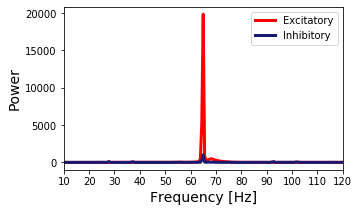

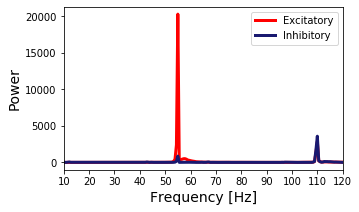

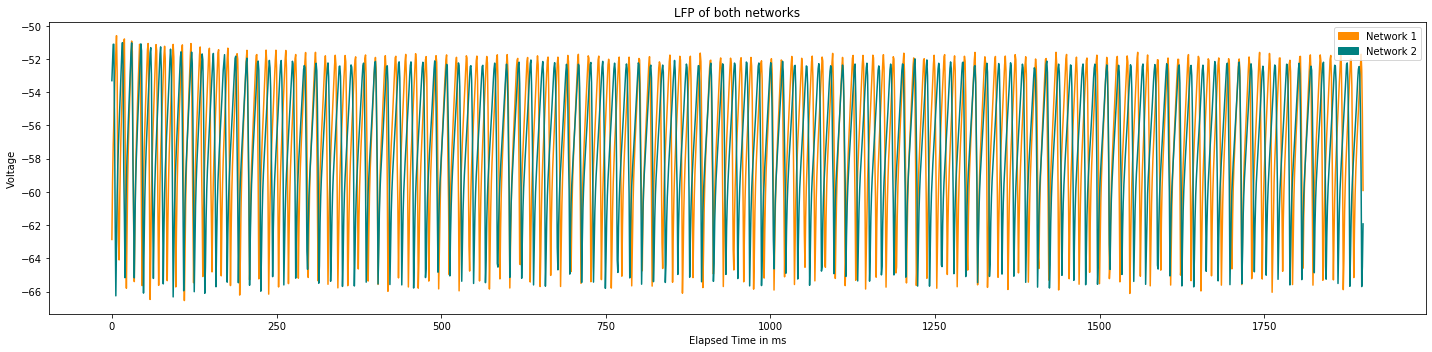

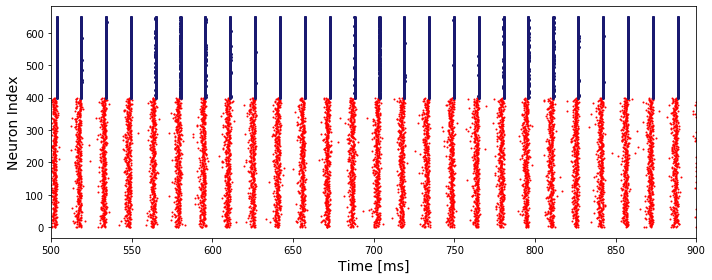

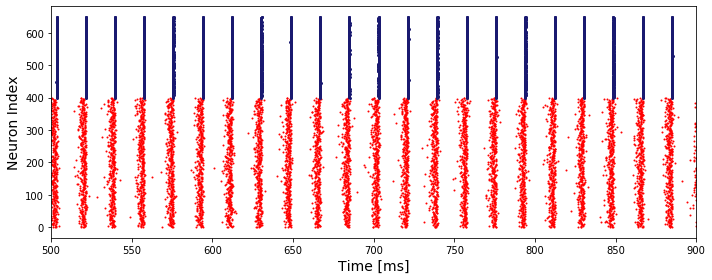

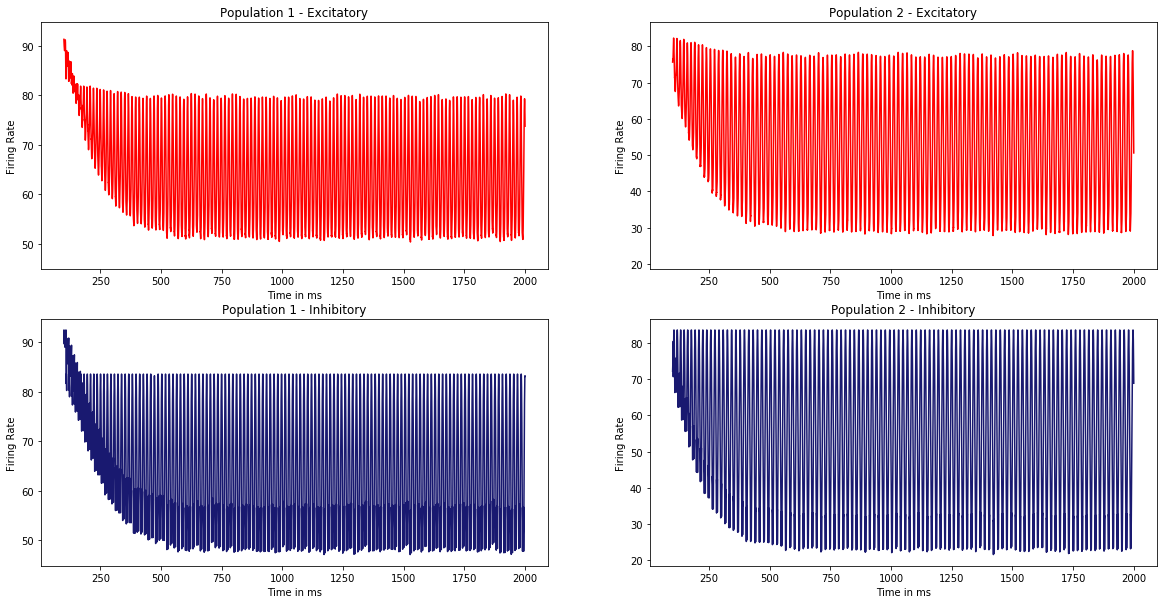

In [108]:
plots.plot_results(model)

# No Connectivity and Uncorrelated Noisy Input

**Expected:** We expect random firing of neurons, while firing frequency is close to mean input frequency of noisy input.

We observe that the firing of neurons in the first 200 ms is strongly correlated but decreases with ongoing simulation time until it's uncorrelated.
Reason for this behavior is the identical initialization of membrane voltage, synaptic conductance and currents.

In [8]:
run_params = dict(params)
run_params.update({
   "p_etoe": 0.0,
   "p_etoi": 0.0,
   "p_itoe": 0.0,
   "p_itoi": 0.0,
   "p_ppee": 0.0,
   "p_ppei": 0.0,
   "poisson_variance": 0.3,
   "poisson_mean_input": 80
})
model = runner.run(modified_params=run_params)

Starting simulation at t=0. s for a duration of 2. s
1.25625 s (62%) simulated in 10s, estimated 6s remaining.
2. s (100%) simulated in 15s


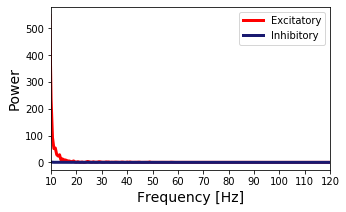

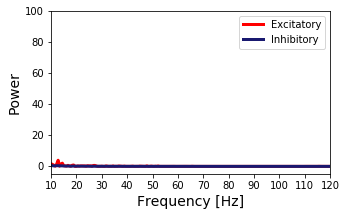

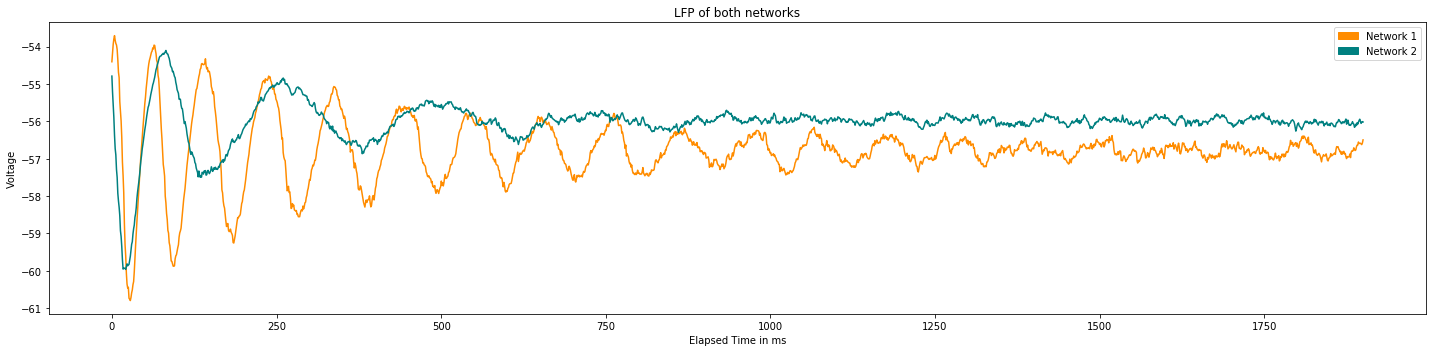

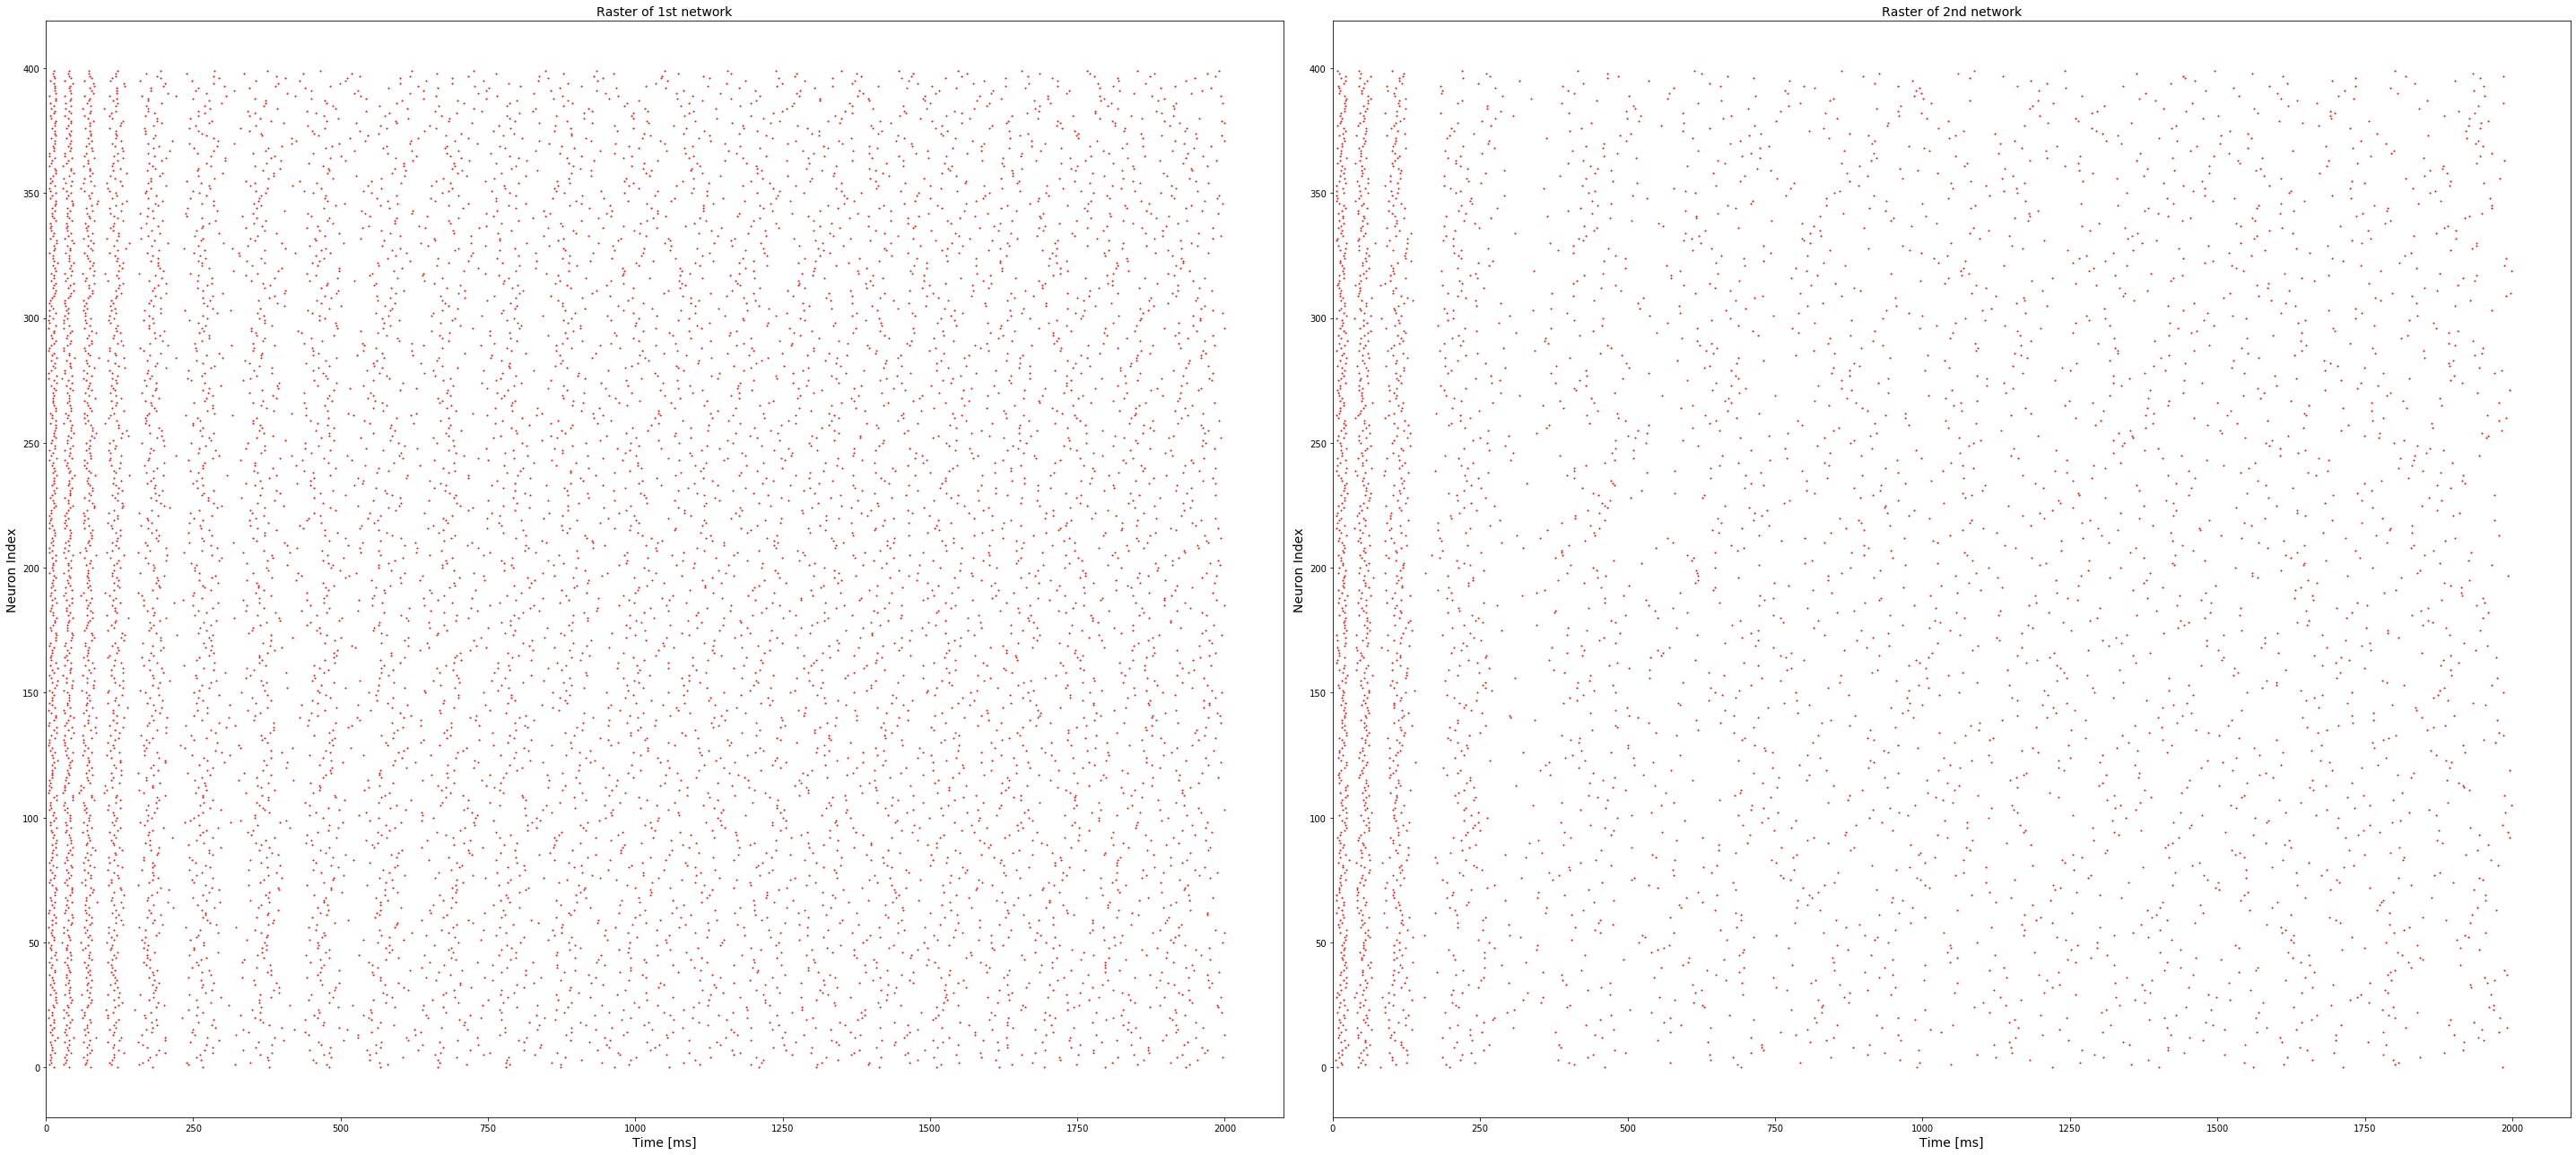

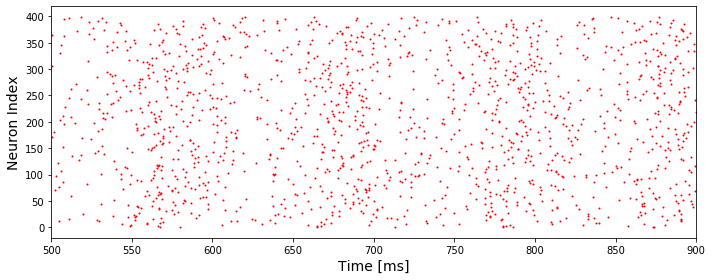

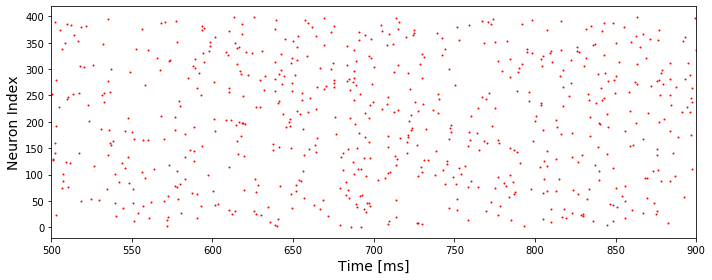

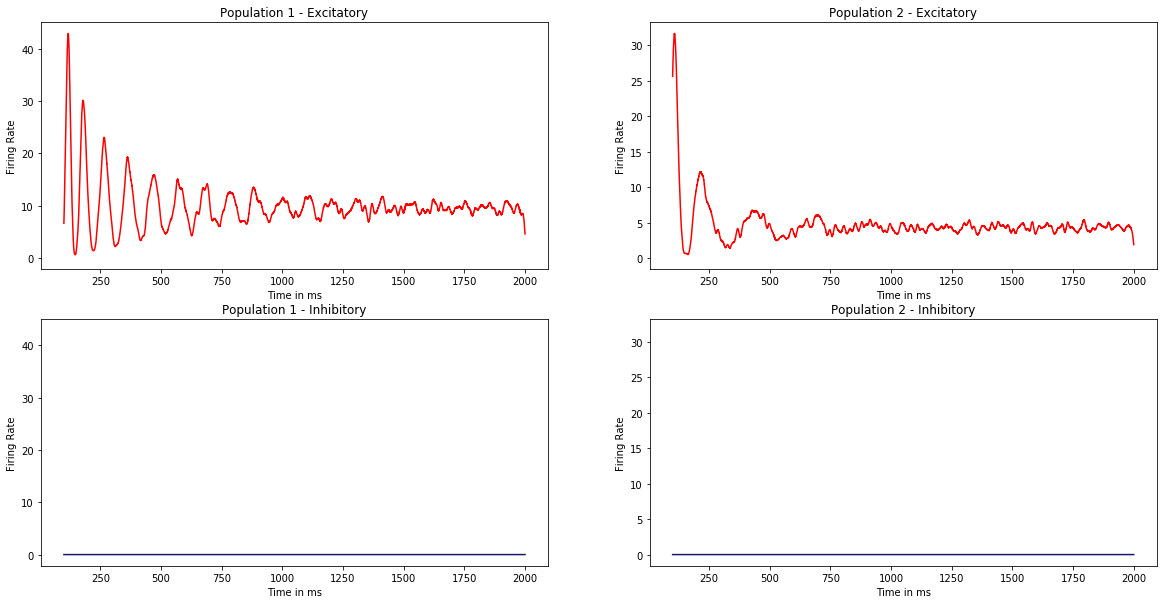

In [9]:
plots.plot_results(model, full_raster=True, pop_rates=True)

# Recurrency but no Connectivity between E and I

Excitatory neurons excite each other leading to strong rhythm determined by time constant.

Inhibitory neurons inhibit each other reducing the excitability to the uncorrelated input.
We also see here no synchronization of the I group.

In [71]:
params_ov = dict(params)
params_ov.update({
   "p_etoe": 0.4,
   "p_etoi": 0.0,
   "p_itoe": 0.0,
   "p_itoi": 2.0,
   "p_ppee": 0.0,
   "p_ppei": 0.0,
    "poisson_variance": 2.0
})
model = runner.run(modified_params=params_ov)

Starting simulation at t=0. s for a duration of 2. s
1.1273 s (56%) simulated in 10s, estimated 8s remaining.
2. s (100%) simulated in 17s


In [72]:
plots.plot_results(params_ov)

KeyError: 'net_record_all_neurons_dt'

# Deactivate E -> I feedback

In [99]:
run_params = dict(params)
run_params.update({
    "J_etoi": 0.0,
   "p_etoi": 0.0,
   "p_ppee": 0.0,
   "p_ppei": 0.0,
#    "J_etoe": 0.0,
#    "J_itoe": 0.0,
#    "J_itoi": 0.0,
 #   "a_exc": 0.0,
#    "b_exc": 0.0,
        "poisson_variance": 2.0
})
model = runner.run(modified_params=run_params)

Starting simulation at t=0. s for a duration of 2. s
1.1403 s (57%) simulated in 10s, estimated 8s remaining.
2. s (100%) simulated in 17s


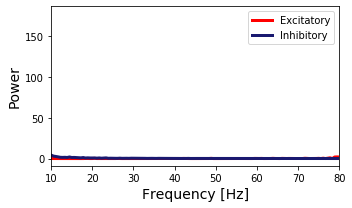

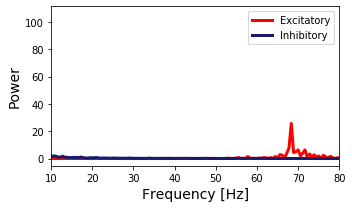

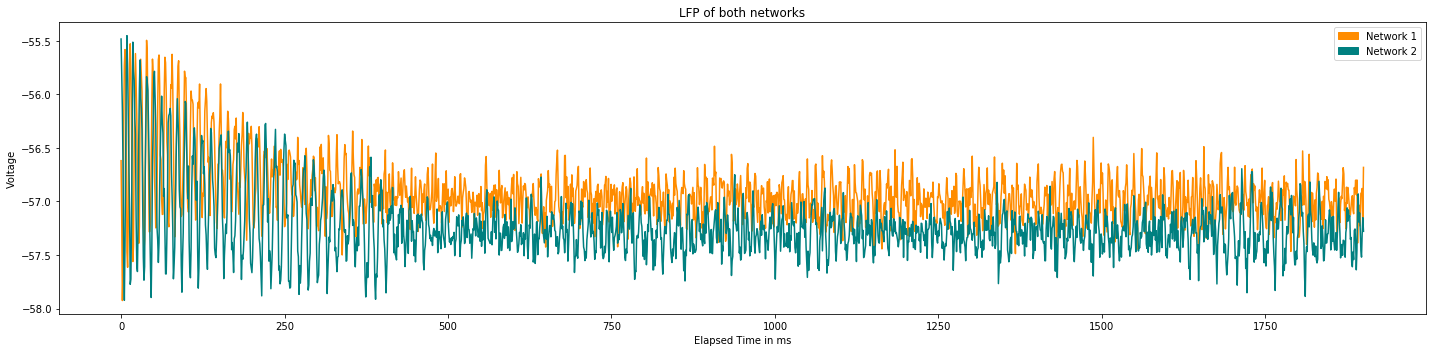

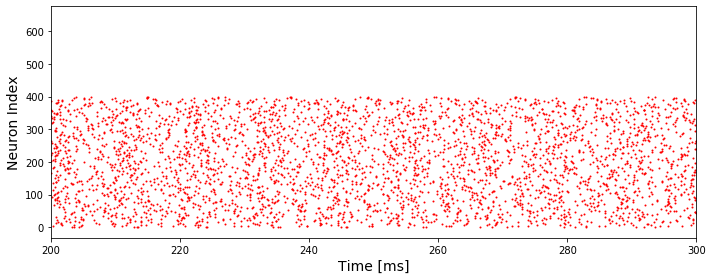

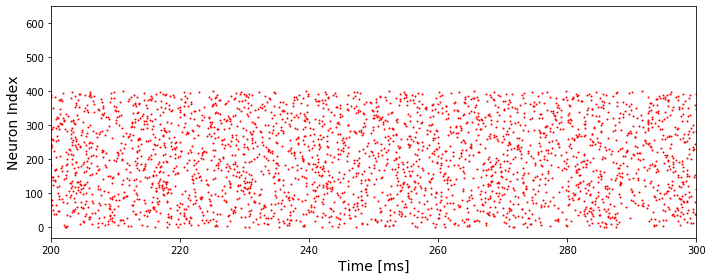

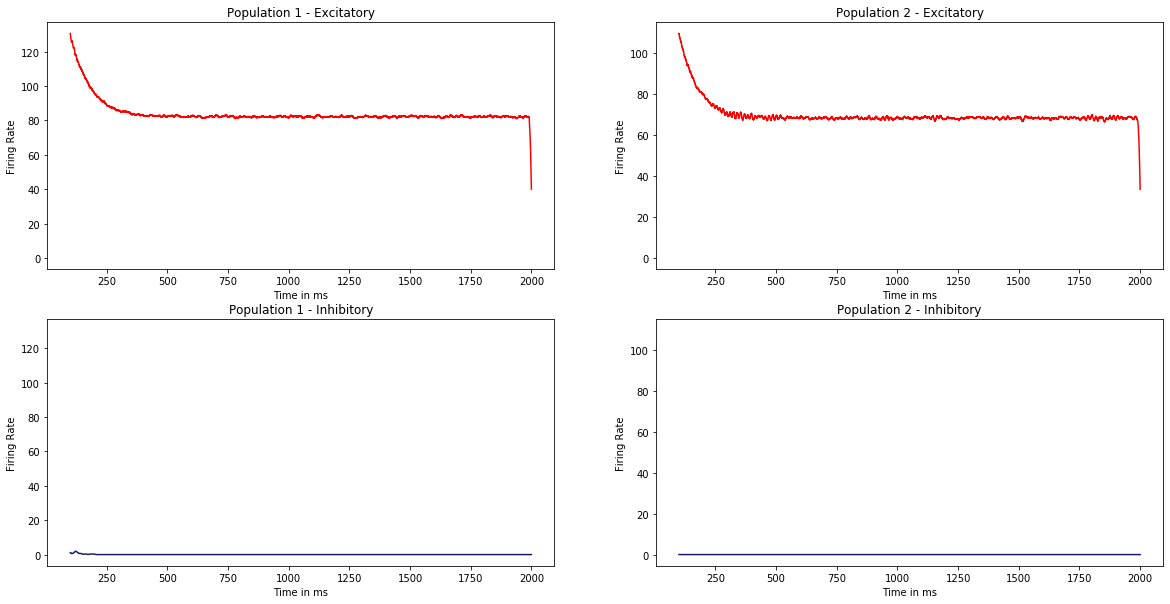

In [100]:
plots.plot_results(model, folder="PING_proof_no_E_to_I", save=True, excerpt_x_left=200, excerpt_x_right=300, x_max_psd=80)

# Only Input to E Population

In [105]:
run_params = dict(params)
run_params.update({
    "poisson_enabled": [True, True],
    "poisson_I_enabled": False,
    "J_etoi": 0.07,
    "p_ppee": 0.0,
    "p_ppei": 0.0,
    "p_ppii": 0.0,
    "poisson_variance": 2.0
})
model = runner.run(modified_params=run_params)

Starting simulation at t=0. s for a duration of 2. s
1.2168 s (60%) simulated in 10s, estimated 6s remaining.
2. s (100%) simulated in 16s


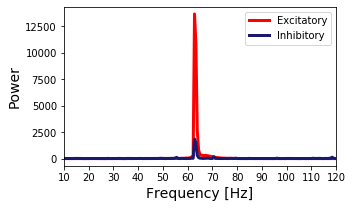

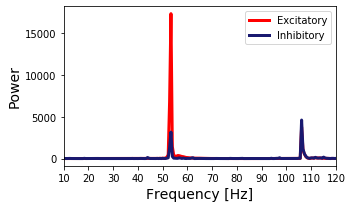

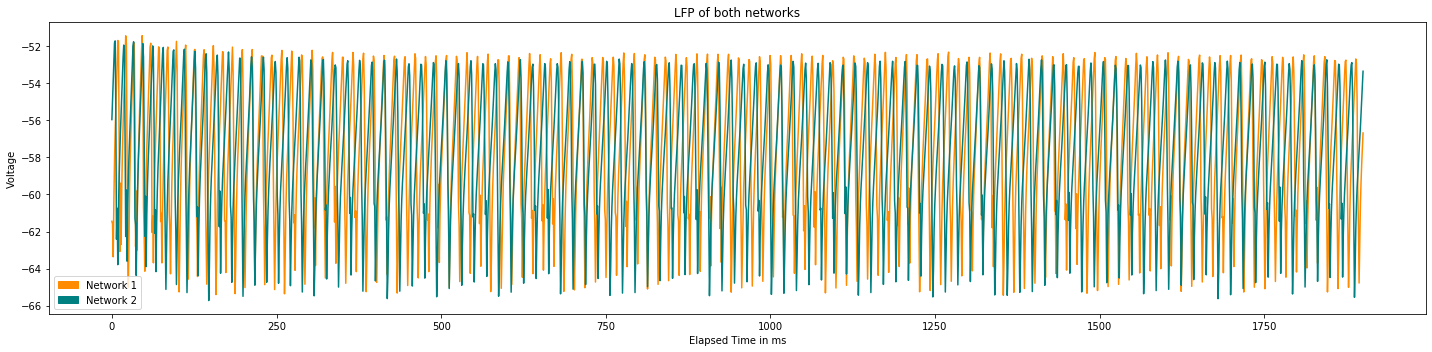

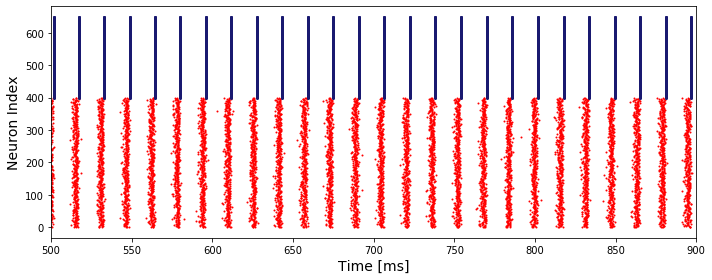

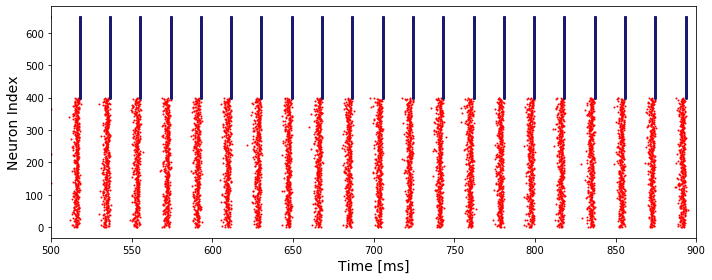

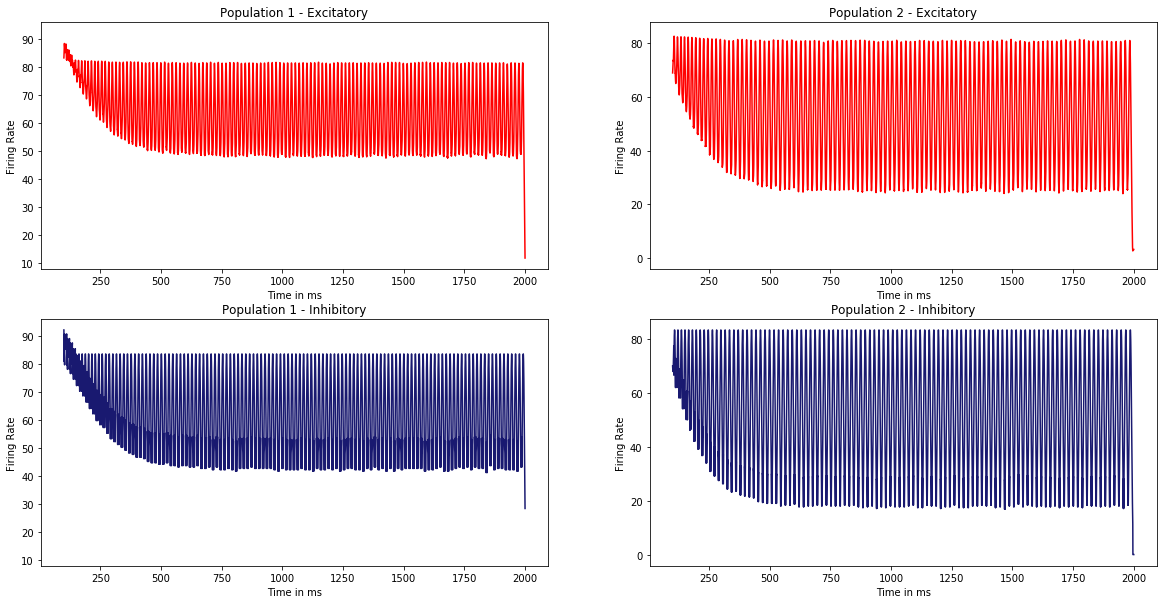

In [106]:
plots.plot_results(model, folder="PING_proof_only_E_input", save=True)